In [26]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations, DifferentialEquations
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\acos{\,{\rm acos}\,}
\def\vc#1{{\mathbf #1}}
\def\ip<#1,#2>{\left\langle#1,#2\right\rangle}
\def\norm#1{\left\|#1\right\|}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes

# Chapter 3: Orthogonal Polynomials

We now introduce orthogonal polynomials (OPs). These are ___fundamental___ for computational mathematics, with applications in
1. Function approximation
2. Quadrature (calculating integrals)
2. Solving differential equations
3. Spectral analysis of Schrödinger operators

We will investigate the properties of _general_ OPs:

1. Construction via Gram–Schmidt 
2. Three-term recurrence relationships
3. Gaussian quadrature
3. Relationship with Cauchy and logarithmic transforms

We will also investigate the properties of _classical_ OPs:

1. Explicit formulae
3. Rodriguez formulae
2. Ordinary differential equations
2. Derivatives

A good reference is  [Digital Library of Mathematical Functions, Chapter 18](http://dlmf.nist.gov/18).



# Lecture 14: Constructing orthogonal polynomials


This lecture we do the following:
1. Definition of orthogonal polynomials
2. Definition of classical orthogonal polynomials
    - Hermite, Laguerre, and Jacobi polynomials
    - Legendre, Chebyshev, and ultraspherical polynomials
    - Explicit construction for Chebyshev polynomials
2. Construction of orthogonal polynomials via Gram–Schmidt process    
3. Function approximation with orthogonal polynomials    


## Definition of orthogonal polynomials

Let $p_0(x),p_1(x),p_2(x),…$ be a sequence of polynomials such that $p_n(x)$ is exactly degree $n$, that is,
$$
p_n(x) = k_n x^n + O(x^{n-1})
$$
where $k_n \neq 0$.

Let $w(x)$ be a continuous weight function on a (possibly infinite) interval $(a,b)$: that is $w(x) \geq 0$ for all $a < x < b$. This induces an inner product
$$
\ip<f,g> := \int_a^b f(x) g(x) w(x) \dx
$$
We say that $\{p_0, p_1,\ldots\}$ are _orthogonal with respect to the weight $w$_ if 
$$
\ip<p_n,p_m> = 0\qqfor n \neq m.
$$
Because $w$ is continuous, we have
$$
\norm{p_n}^2 = \ip<p_n,p_n> > 0 .
$$

Orthogonal polymomials are not unique: we can multiply each $p_n$ by a different nonzero constant $\tilde p_n(x) = c_n p_n(x)$, and $\tilde p_n$ will be orthogonal w.r.t. $w$.  However, if we specify $k_n$, this is sufficient to uniquely define them:

**Proposition (Uniqueness of OPs I)** Given a non-zero $k_n$, there is a unique polynomial $p_n$ orthogonal w.r.t. $w$ to all lower degree polynomials.

**Proof** Suppose $r_n(x) = k_n x^n + O(x^{n-1})$ is another  OP w.r.t. $w$. We want to show $p_n - r_n$ is zero. But this is a polynomial of degree $<n$, hence
$$
p_n(x) - r_n(x) = \sum_{k=0}^{n-1} c_k p_k(x)
$$
But we have for $k \leq n-1$
$$
\ip<p_k,p_k> c_k = \ip<p_n - r_n, p_k> = \ip<p_n,p_k> - \ip<r_n, p_k> = 0 - 0 = 0
$$
which shows all $c_k$ are zero.

**Corollary (Uniqueness of OPs I)** If $q_n$ and $p_n$ are orthogonal w.r.t. $w$ to all lower degree polynomials, then $q_n(x) = C p_n(x)$ for some constant $C$. 

### Monic orthogonal polynomials

If $k_n = 1$, that is, 
$$
p_n(x) = x^n + O(x^{n-1})
$$
then we refer to the orthogonal polymomials as monic.

Monic OPs are unique as we have specified $k_n$.


### Orthonormal polynomials

If  $\norm{p_n} = 1$, then we refer to the orthogonal polynomials as orthonormal w.r.t. $w$.  We will usually use $q_n$ when they are orthonormal.   Note it's not unique: we can multiply by $\pm 1$ without changing the norm.


**Remark** The classical OPs are __not__ monic or orthonormal (apart from one case). Many people make the mistake of using orthonormal polynomials for computations. But there is a good reason to use classical OPs: their properties result in rational formulae, whereas orthonormal polynomials require square roots. This makes a big performance difference.


## Definition of classical orthogonal polynomials

Classical orthogonal polynomials are orthogonal with respect to the following three weights:


| Name        | Interval $(a,b)$ |Weight  function  $w(x)$      | Standard polynomial   | highest order coefficient $k_n$ |
|:-------------|:------------- |:----------------------|:-----|:-----|
| Hermite     |$(-\infty,\infty)$ | $\E^{-x^2}$             | $H_n(x)$ | $2^n$ |
| Laguerre    | $(0,\infty)$ | $x^\alpha \E^{-x}$      |   $L_n^{(\alpha)}(x)$ | See [Table 18.3.1](http://dlmf.nist.gov/18.3) |
| Jacobi      | $(-1,1)$ | $(1-x)^{\alpha} (1+x)^\beta$      |    $P_n^{(\alpha,\beta)}(x)$ | See [Table 18.3.1](http://dlmf.nist.gov/18.3) |


Note out of convention the parameters for Jacobi polynomials are in the "wrong" order.

We can actually construct these polynomials in Julia: first consider Hermite:

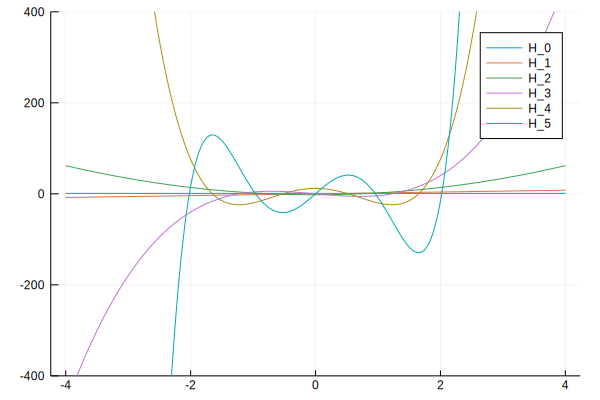

In [5]:
H₀ = Fun(Hermite(), [1])
H₁ = Fun(Hermite(), [0,1])
H₂ = Fun(Hermite(), [0,0,1])
H₃ = Fun(Hermite(), [0,0,0,1])
H₄ = Fun(Hermite(), [0,0,0,0,1])
H₅ = Fun(Hermite(), [0,0,0,0,0,1])

xx = -4:0.01:4
plot(xx, H₀.(xx); label="H_0", ylims=(-400,400))
plot!(xx, H₁.(xx); label="H_1", ylims=(-400,400))
plot!(xx, H₂.(xx); label="H_2", ylims=(-400,400))
plot!(xx, H₃.(xx); label="H_3", ylims=(-400,400))
plot!(xx, H₄.(xx); label="H_4", ylims=(-400,400))
plot!(xx, H₅.(xx); label="H_5")


We verify their orthogonality:

In [6]:
w = Fun(GaussWeight(), [1.0])

@show sum(H₂*H₅*w)  # means integrate
@show sum(H₅*H₅*w);

sum(H₂ * H₅ * w) = 0.0
sum(H₅ * H₅ * w) = 6806.222787477181


Now Jacobi:

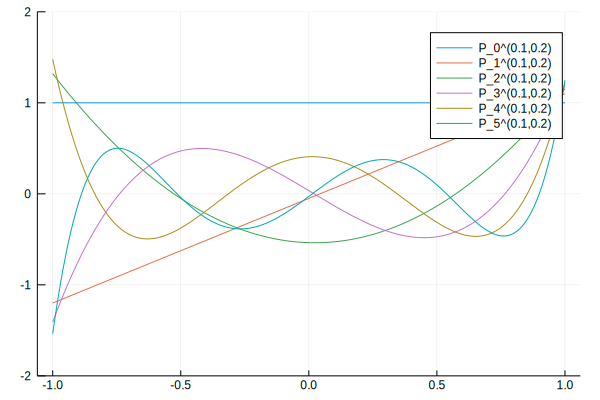

In [7]:
α,β = 0.1,0.2
P₀ = Fun(Jacobi(β,α), [1])
P₁ = Fun(Jacobi(β,α), [0,1])
P₂ = Fun(Jacobi(β,α), [0,0,1])
P₃ = Fun(Jacobi(β,α), [0,0,0,1])
P₄ = Fun(Jacobi(β,α), [0,0,0,0,1])
P₅ = Fun(Jacobi(β,α), [0,0,0,0,0,1])

xx = -1:0.01:1
plot( xx, P₀.(xx); label="P_0^($α,$β)", ylims=(-2,2))
plot!(xx, P₁.(xx); label="P_1^($α,$β)")
plot!(xx, P₂.(xx); label="P_2^($α,$β)")
plot!(xx, P₃.(xx); label="P_3^($α,$β)")
plot!(xx, P₄.(xx); label="P_4^($α,$β)")
plot!(xx, P₅.(xx); label="P_5^($α,$β)")

In [8]:
w = Fun(JacobiWeight(β,α), [1.0])
@show sum(P₂*P₅*w)  # means integrate
@show sum(P₅*P₅*w);

sum(P₂ * P₅ * w) = 2.1250362580715887e-17
sum(P₅ * P₅ * w) = 0.2171335824839316


## Legendre, Chebyshev, and ultraspherical polynomials

There are special families of Jacobi weights with their own name. 

| Name        | Jacobi parameters  |Weight  function  $w(x)$      | Standard polynomial   | highest order coefficient $k_n$ |
|:-------------|:------------- |:----------------------|:-----|:------|
| Jacobi      | $\alpha,\beta$ | $(1-x)^{\alpha} (1+x)^\beta$      |    $P_n^{(\alpha,\beta)}(x)$ | See [Table 18.3.1](http://dlmf.nist.gov/18.3) | 
| Legendre      | $0,0$ | $1$      |    $P_n(x)$ | $2^n(1/2)_n/n!$ | 
| Chebyshev (first kind)      | $-{1 \over 2},-{1 \over 2}$ | $1 \over \sqrt{1-x^2}$ | $T_n(x)$ | $1 (n=0), 2^{n-1} (n \neq 0)$ |
| Chebyshev (second kind)      | ${1 \over 2},{1 \over 2}$ | $\sqrt{1-x^2}$      |    $U_n(x)$ | $2^n$
| Ultraspherical      | $\lambda-{1 \over 2},\lambda-{1 \over 2}$ | $(1-x^2)^{\lambda - 1/2}, \lambda \neq 0$      |    $C_n^{(\lambda)}(x)$ | $2^n(\lambda)_n/n!$ |

Note that other than Legendre, these polynomials have a different normalization than $P_n^{(\alpha,\beta)}$:


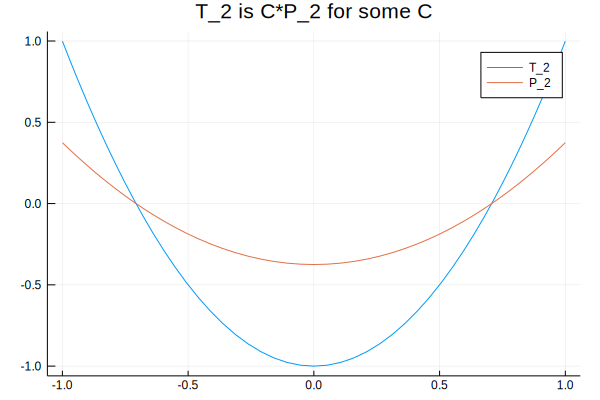

In [11]:
T₂ = Fun(Chebyshev(), [0.0,0,1])
P₂ = Fun(Jacobi(-1/2,-1/2), [0.0,0,1])
plot(T₂; label="T_2", title="T_2 is C*P_2 for some C")
plot!(P₂; label="P_2") 

But because they are orthogonal w.r.t. the same weight, they must be a constant multiple of each-other.

### Explicit construction of Chebyshev polynomials (first kind and second kind)

Chebyshev polynomials are pretty much the only OPs with _simple_ closed form expressions.

**Proposition (Chebyshev first kind formula)** 
$$T_n(x) = \cos n \acos x$$
or in other words,
$$
T_n(\cos \theta) = \cos n \theta
$$

**Proof** We first show that they are orthogonal w.r.t. $1/\sqrt{1-x^2}$. Too easy: do $x = \cos \theta$, $\dx = -\sin \theta$ to get (for $n \neq m$)
$$
    \int_{-1}^1 {\cos n \acos x \cos m \acos x \dx \over \sqrt{1-x^2}} = -\int_\pi^0  \cos n \theta \cos m \theta \D \theta =  \int_0^\pi  {\E^{\I (-n-m)\theta} + \E^{\I (n-m)\theta} + \E^{\I (m-n)\theta} + \E^{\I (n+m)\theta}    \over 4} \D \theta =0
$$

We then need to show it has the right highest order term $k_n$. Note that $k_0 = k_1 = 1$.  Using $z = \E^{\I \theta}$ we see that $\cos n \theta$ has a simple recurrence for $n=2,3,\ldots$:
$$
\cos n \theta = {z^n + z^{-n} \over 2} = 2 {z + z^{-1} \over 2} {z^{n-1} + z^{1-n} \over 2}- {z^{n-2} + z^{2-n} \over 2} = 2 \cos \theta \cos (n-1)\theta - \cos(n-2)\theta 
$$
thus 
$$
\cos n \acos x = 2 x \cos(n-1) \acos x - \cos(n-2) \acos x
$$
It follows that 
$$
k_n = 2 x k_{n-1} = 2^{n-1} k_1 = 2^{n-1}
$$
By uniqueness we have $T_n(x) \cos n \acos x$.

⬛️



**Proposition (Chebyshev second kind formula)** 
$$U_n(x) = {\sin (n+1) \acos x \over \sin \acos x}$$
or in other words,
$$
U_n(\cos \theta) = {\sin (n+1) \theta \over \sin \theta}
$$



## Gram–Schmidt algorithm

In general we don't have nice formulae. But we can always construct them via Gram–Schmidt:

**Proposition (Gram–Schmidt)** Define
\begin{align*}
p_0(x) = 1 \\
q_0(x) = {1 \over \norm{p_0}}\\
p_{n+1}(x) = x q_n(x) - \sum_{k=0}^n \ip<x q_n, q_k> q_k(x)\\
q_{n+1}(x) = {p_{n+1}(x) \over \norm{p_n}}
\end{align*}
Then $q_0(x), q_1(x), \ldots$ are orthonormal w.r.t. $w$.

**Proof** By linearity we have
$$
\ip<p_{n+1}, q_j> = \ip<x q_n - \sum_{k=0}^n \ip<x q_n, q_k> q_k, q_j> = \ip<x q_n, q_j> - \ip<x q_n, q_j> \ip<q_j,q_j> = 0
$$
Thus $p_{n+1}$ is orthogonal to all lower degree polynomials. So is $q_{n+1}$, since it is a constant multiple of $p_{n+1}$.

⬛️

Let's make our own family:

In [15]:
x = Fun()
w = exp(x)
ip = (f,g) -> sum(f*g*w)
nrm = f    -> sqrt(ip(f,f))
n = 10
q = Array{Fun}(undef,n)
p = Array{Fun}(undef,n)
p[1] = Fun(1, -1 .. 1 )
q[1] = p[1]/nrm(p[1])

for k=1:n-1
    p[k+1] = x*q[k] 
    for j=1:k
        p[k+1] -= ip(p[k+1],q[j])*q[j]
    end
    q[k+1] = p[k+1]/nrm(p[k+1])
end

In [16]:
sum(q[2]*q[4]*w)

2.338624086051233e-16

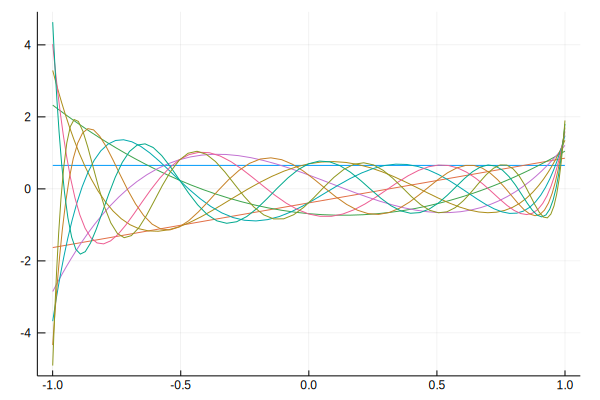

In [17]:
p = plot(; legend=false)
for k=1:10
    plot!(q[k])
end
p


## Function approximation with orthogonal polynomials

A basic usage of orthogonal polynomials is for polynomial approximation. Suppose $f(x)$ is a degree $n-1$ polynomial. Since $\{p_0(x),\ldots,p_{n-1}(x)\}$ span all degree $n-1$ polynomials, we know that
$$
f(x) = \sum_{k=0}^{n-1} f_k p_k(x)
$$
where
$$
f_k = {\ip<f, p_k> \over \ip<p_k,p_k>}
$$

Here, we demonstrate this with Chebyshev polynomials:

In [18]:
f = Fun(x -> 1 + x + x^2 + x^3, Chebyshev())
f₀, f₁, f₂, f₃ = f.coefficients
@show f₀, f₁, f₂, f₃

x = 0.1
@show f₀*1 + f₁*x + f₂*cos(2acos(x)) + f₃*cos(3acos(x))
@show 1 + x + x^2 + x^3;

(f₀, f₁, f₂, f₃) = (1.5, 1.7499999999999998, 0.5, 0.25000000000000006)
f₀ * 1 + f₁ * x + f₂ * cos(2 * acos(x)) + f₃ * cos(3 * acos(x)) = 1.111
1 + x + x ^ 2 + x ^ 3 = 1.111


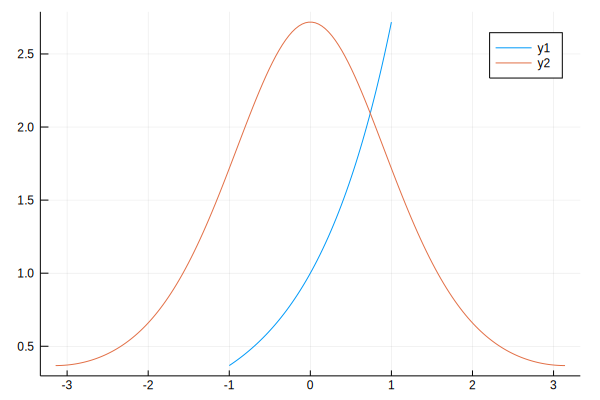

In [19]:
plot(Fun(exp))
plot!(Fun(t-> exp(cos(t)), -pi .. pi))

In [22]:
x = Fun()
ip = (f,g) -> sum(f*g/sqrt(1-x^2))

T₂ = cos.(2 .* acos.(x))
ip(T₂,f)/ip(T₂,T₂) # gives back f₂

0.5

Of course, if $p_k$ are othernormal than we don't need the denominator.

This can be extended to function approximation Provided the sum converges absolutely and uniformly in $x$, we can write
$$
f(x) = \sum_{k=0}^\infty f_k p_k(x).
$$
In practice, we can approximate smooth functions by a finite truncation:
$$
f(x) \approx f_n(x) = \sum_{k=0}^{n-1} f_k p_k(x)
$$

Here we see that $\E^x$ can be approximated by a Chebyshev approximation using 14 coefficients and is accurate to 16 digits:

In [23]:
f = Fun(x -> exp(x), Chebyshev())
@show f.coefficients
@show ncoefficients(f)

@show f(0.1) # equivalent to f.coefficients'*[cos(k*acos(x)) for k=0:ncoefficients(f)-1]
@show exp(0.1);

f.coefficients = [1.26607, 1.13032, 0.271495, 0.0443368, 0.00547424, 0.000542926, 4.49773e-5, 3.19844e-6, 1.99212e-7, 1.10368e-8, 5.5059e-10, 2.49796e-11, 1.03911e-12, 3.98969e-14]
ncoefficients(f) = 14
f(0.1) = 1.1051709180756477
exp(0.1) = 1.1051709180756477


The accuracy of this approximation is typically dictated by the smoothness of $f$: the more times we can differentiate, the faster it converges. For analytic functions, it's dictated by the domain of analyticity, just like Laurent/Fourier series. In the case above, $\E^x$ is entire hence we get faster than exponential convergence.


Chebyshev expansions work even when Taylor series do not. For example, the following function has poles at $\pm {\I \over 5}$, which means the radius of convergence for the Taylor series is $ |x| < {1 \over 5}$, but Chebyshev polynomials continue to work on $[-1,1]$:

ncoefficients(f) = 189


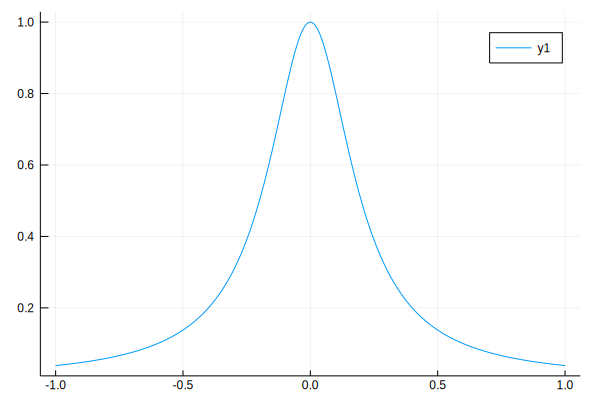

In [24]:
f = Fun( x -> 1/(25x^2 + 1), Chebyshev())
@show ncoefficients(f)
plot(f)

This can be explained for Chebyshev expansion by noting that it is cosine expansion / Fourier expansion of an even function:
$$
f(x) = \sum_{k=0}^\infty f_k T_k(x) \Leftrightarrow f(\cos \theta) = \sum_{k=0}^\infty f_k \cos k \theta
$$
From Lecture 4 we saw that Fourier coefficients decay exponentially (thence the approximation converges exponentially fast) uf  $f\left({z + z^{-1} \over 2}\right)$ is analytic in an ellipse. In the case of $f(x) = {1 \over 25 x^2 + 1}$, we find that 
$$
f(z) = {4 z^2 \over 25 + 54 z^2 + 25 z^4}
$$
which has poles at 
$
\pm 0.8198040\I,\pm1.2198\I:
$

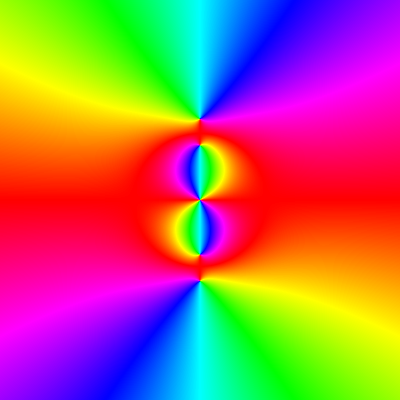

In [29]:
f = x -> 1/(25x^2 + 1)
portrait(-3..3, -3..3, z -> f((z+1/z)/2))

Hence we predict a rate of decay of about $1.2198^{-k}$:

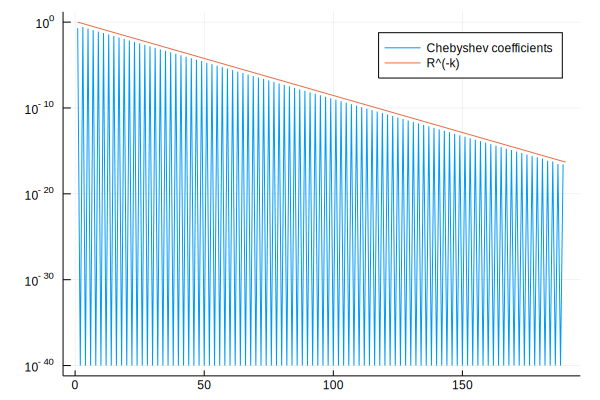

In [31]:
f = Fun( x -> 1/(25x^2 + 1), Chebyshev())
plot(abs.(f.coefficients) .+ 1E-40; yscale=:log10, label="Chebyshev coefficients")
plot!( 1.2198.^(-(0:ncoefficients(f))); label="R^(-k)")


### Weighted approximation

Sometimes, we want to incorporate the weight into the approximation. This is typically one of two forms, depending on the application: 
$$
f(x) = w(x) \sum_{k=0}^\infty f_k p_k(x)
$$
or
$$
        f(x) = \sqrt{w(x)} \sum_{k=0}^\infty f_k p_k(x)
$$

This is often the case with Hermite polynomials: on the real line polynomial approximation is unnatural unless the function approximated is a polynomial as otherwise the behaviour at ∞ is inconsistent, so what we really want is weighted approximation. Thus we can either use
$$
f(x) = \E^{-x^2}\sum_{k=0}^\infty f_k H_k(x)
$$
or
$$
f(x) = \E^{-x^2/2}\sum_{k=0}^\infty f_k H_k(x)
$$
Depending on your problem, getting this wrong can be disasterous:

In [32]:
f = Fun(x -> 1+x +x^2, Hermite())
f(0.10)

1.109999999999997

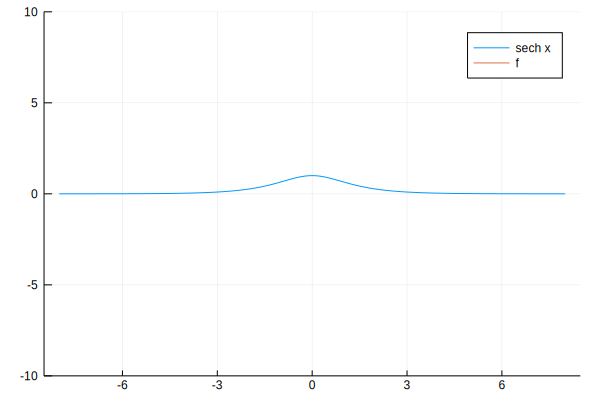

In [45]:
# nonsense trying to approximating sech(x) by a degree 50 polynomial:
f = Fun(x -> sech(x), Hermite(), 51)
xx = -8:0.01:8
plot(xx, sech.(xx); ylims=(-10,10), label="sech x")
plot!(xx, f.(xx); label="f")

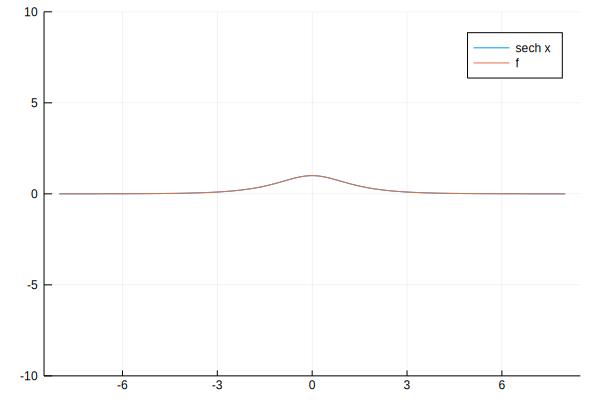

In [46]:
# weighted by works sqrt(w(x)) = exp(-x^2/2)
f = Fun(x -> sech(x), GaussWeight(Hermite(),1/2),101)

plot(xx, sech.(xx); ylims=(-10,10), label="sech x")
plot!(xx, f.(xx); label="f")

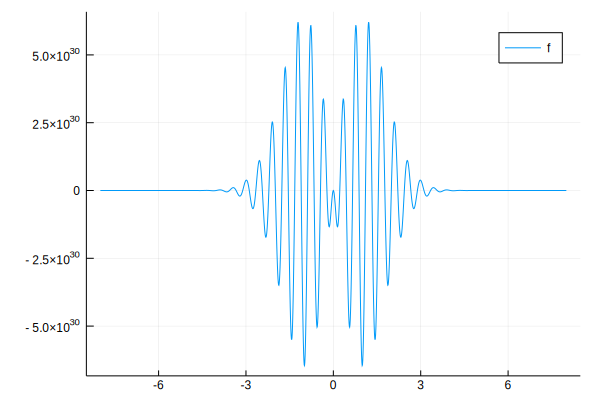

In [52]:
# weighted by w(x) = exp(-x^2) breaks again
f = Fun(x -> sech(x), GaussWeight(Hermite()),101)

plot(xx, sech.(xx); ylims=(-10,10), label="sech x")
plot(xx, f.(xx); label="f")

Note that correctly weighted Hermite, that is, with $\sqrt{w(x)} = \E^{-x^2/2}$ look "nice":

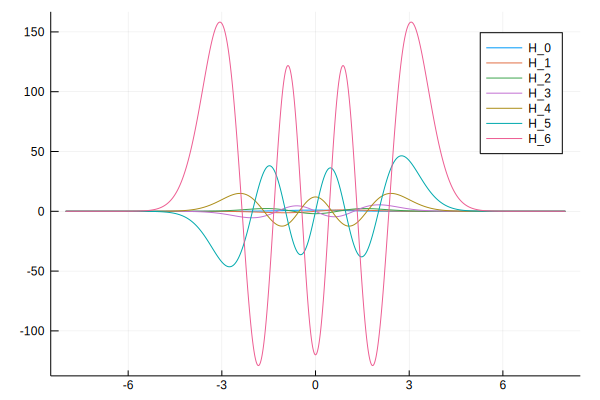

In [53]:
p = plot()
for k=0:6
    H_k = Fun(GaussWeight(Hermite(),1/2),[zeros(k);1])
    plot!(xx, H_k.(xx); label="H_$k")
end
p

Compare this to weighting by $w(x) = \E^{-x^2}$:

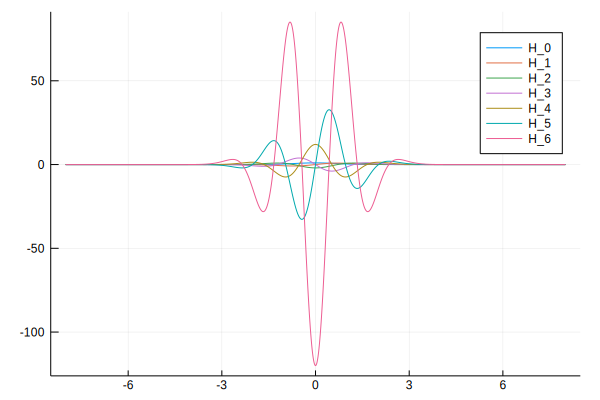

In [54]:
p = plot()
for k=0:6
    H_k = Fun(GaussWeight(Hermite()),[zeros(k);1])
    plot!(xx, H_k.(xx); label="H_$k")
end
p